In [1]:

from datetime import datetime

import torch
from torch.utils.data import DataLoader

from datasets.LabeledImageDataset import LabeledImageDataset
from models.resnet import Resnet50Model, Resnet18Model
from train import train_classifier
from utils import plot_model_metrics
from utils import reduce_dataset, split_dataset, undersample_dataset

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

batch_size = 128
dataset = LabeledImageDataset("data/candidates")
dataset = reduce_dataset(dataset, discard_ratio=0.0)
train_dataset, test_dataset = split_dataset(dataset, train_ratio=0.7)
train_dataset = undersample_dataset(train_dataset)

train_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(test_dataset,
                         batch_size=batch_size,
                         shuffle=True, )

model = Resnet18Model(hidden_layers=2, units_per_layer=2048, dropout=0.4)

print(f"Dataset: {len(train_dataset):,} training, {len(test_dataset):,} testing")


Device: cuda:0
Dataset: 296 training, 2,470 testing


In [2]:
print(model)

Resnet18Model(
  (pretrained_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

In [3]:
print(f"Training starts {datetime.now().isoformat()}")

Training starts 2024-11-13T19:16:08.028211


In [4]:

model = model.to(device)
model, model_metrics = train_classifier(model, train_loader, test_loader, device,
                                        learning_rate=0.0001,
                                        max_epochs=50,
                                        checkpoint_every=1,
                                        eval_every=1)


Epoch 1 training: 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]


Train: 1/50: loss:0.6909335056940714


Epoch 1 testing: 100%|██████████| 20/20 [00:06<00:00,  3.32it/s]


Test: 1/50: loss:0.6981625705957413, accuracy:0.46040296052631574, precision:0.042421565253082036, recall:0.9083333333333332, f1:0.08016566135999137, mcc:0.11894277971744797, epoch:0


Epoch 2 training: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]


Train: 2/50: loss:0.6743270556131998


Epoch 2 testing: 100%|██████████| 20/20 [00:06<00:00,  3.00it/s]


Test: 2/50: loss:0.7388274252414704, accuracy:0.19475740131578947, precision:0.03000205705027642, recall:0.95, f1:0.05768684745059212, mcc:0.06717083174700773, epoch:1


Epoch 3 training: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]


Train: 3/50: loss:0.6531545122464498


Epoch 3 testing: 100%|██████████| 20/20 [00:06<00:00,  2.97it/s]


Test: 3/50: loss:0.6818375051021576, accuracy:0.6072574013157894, precision:0.05648097764375674, recall:0.8607142857142858, f1:0.1043618502965065, mcc:0.15872709572371682, epoch:2


Epoch 4 training: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]


Train: 4/50: loss:0.6248336037000021


Epoch 4 testing: 100%|██████████| 20/20 [00:07<00:00,  2.84it/s]


Test: 4/50: loss:0.6141751050949097, accuracy:0.7705797697368422, precision:0.0949460374929851, recall:0.9161904761904761, f1:0.1690431789819012, mcc:0.24314570319803747, epoch:3


Epoch 5 training: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]


Train: 5/50: loss:0.6003541350364685


Epoch 5 testing: 100%|██████████| 20/20 [00:07<00:00,  2.81it/s]


Test: 5/50: loss:0.5863943666219711, accuracy:0.7673108552631579, precision:0.094991927568921, recall:0.9191666666666667, f1:0.1682314030112816, mcc:0.24242001044961511, epoch:4


Epoch 6 training: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]


Train: 6/50: loss:0.552790234486262


Epoch 6 testing: 100%|██████████| 20/20 [00:07<00:00,  2.79it/s]


Test: 6/50: loss:0.6344547867774963, accuracy:0.6655222039473684, precision:0.06827791518772902, recall:0.9458333333333334, f1:0.12540610532366467, mcc:0.1930098803481024, epoch:5


Epoch 7 training: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]


Train: 7/50: loss:0.5285229086875916


Epoch 7 testing: 100%|██████████| 20/20 [00:07<00:00,  2.80it/s]


Test: 7/50: loss:0.5088234797120095, accuracy:0.7890830592105262, precision:0.09842214158485577, recall:0.7208333333333333, f1:0.17031147255307671, mcc:0.2243541857100276, epoch:6


Epoch 8 training: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]


Train: 8/50: loss:0.47685545682907104


Epoch 8 testing: 100%|██████████| 20/20 [00:07<00:00,  2.83it/s]


Test: 8/50: loss:0.4388764321804047, accuracy:0.8180921052631579, precision:0.1123624430489419, recall:0.8147222222222222, f1:0.19325987385224846, mcc:0.2561050081639388, epoch:7


Epoch 9 training: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]


Train: 9/50: loss:0.42365436752637226


Epoch 9 testing: 100%|██████████| 20/20 [00:07<00:00,  2.80it/s]


Test: 9/50: loss:0.493417726457119, accuracy:0.7858141447368421, precision:0.10184140948021567, recall:0.9094444444444445, f1:0.17892742500167716, mcc:0.254482919712796, epoch:8


Epoch 10 training: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]


Train: 10/50: loss:0.3965207238992055


Epoch 10 testing: 100%|██████████| 20/20 [00:07<00:00,  2.83it/s]


Test: 10/50: loss:0.3484059050679207, accuracy:0.8525493421052632, precision:0.13768329334351007, recall:0.7150000000000001, f1:0.22252027713665648, mcc:0.2688699703535167, epoch:9


Epoch 11 training: 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]


Train: 11/50: loss:0.36946338415145874


Epoch 11 testing: 100%|██████████| 20/20 [00:07<00:00,  2.76it/s]


Test: 11/50: loss:0.4588456660509109, accuracy:0.807874177631579, precision:0.10336011465518107, recall:0.834047619047619, f1:0.1802322990595671, mcc:0.24678351274342605, epoch:10


Epoch 12 training: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]


Train: 12/50: loss:0.3624122043450673


Epoch 12 testing: 100%|██████████| 20/20 [00:07<00:00,  2.78it/s]


Test: 12/50: loss:0.5602001190185547, accuracy:0.7740953947368421, precision:0.09575183467972843, recall:0.875, f1:0.17067594949821116, mcc:0.241305728295315, epoch:11


Epoch 13 training: 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]


Train: 13/50: loss:0.31877845525741577


Epoch 13 testing: 100%|██████████| 20/20 [00:07<00:00,  2.80it/s]


Test: 13/50: loss:0.4675129309296608, accuracy:0.8096422697368422, precision:0.11080490311205597, recall:0.8741666666666668, f1:0.1918841641449281, mcc:0.2597331472917382, epoch:12


Epoch 14 training: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]


Train: 14/50: loss:0.35328327616055805


Epoch 14 testing: 100%|██████████| 20/20 [00:07<00:00,  2.75it/s]


Test: 14/50: loss:0.5236543923616409, accuracy:0.7996299342105263, precision:0.10300368001213303, recall:0.7966666666666666, f1:0.17931477156788028, mcc:0.24191602805023943, epoch:13


Epoch 15 training: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]


Train: 15/50: loss:0.29712724188963574


Epoch 15 testing: 100%|██████████| 20/20 [00:07<00:00,  2.80it/s]


Test: 15/50: loss:0.49169434905052184, accuracy:0.8086143092105263, precision:0.10843541986051637, recall:0.8895238095238096, f1:0.19084007020355528, mcc:0.2658086785559345, epoch:14


Epoch 16 training: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]


Train: 16/50: loss:0.3214864631493886


Epoch 16 testing: 100%|██████████| 20/20 [00:07<00:00,  2.77it/s]


Test: 16/50: loss:0.4025721326470375, accuracy:0.8425986842105264, precision:0.11064710136186781, recall:0.6947619047619048, f1:0.1851205544753932, mcc:0.23305357702020096, epoch:15


Epoch 17 training: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]


Train: 17/50: loss:0.2976459562778473


Epoch 17 testing: 100%|██████████| 20/20 [00:07<00:00,  2.77it/s]


Test: 17/50: loss:0.5949312552809716, accuracy:0.7719983552631579, precision:0.09592837629505585, recall:0.8691666666666666, f1:0.1711655121422206, mcc:0.24319671164776527, epoch:16


Epoch 18 training: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]


Train: 18/50: loss:0.2867836554845174


Epoch 18 testing: 100%|██████████| 20/20 [00:07<00:00,  2.80it/s]


Test: 18/50: loss:0.5965353071689605, accuracy:0.7674547697368421, precision:0.0974189698576837, recall:0.8816666666666666, f1:0.17296446179317124, mcc:0.2443845192068296, epoch:17


Epoch 19 training: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]


Train: 19/50: loss:0.27479055027167004


Epoch 19 testing: 100%|██████████| 20/20 [00:07<00:00,  2.81it/s]


Test: 19/50: loss:0.4692008212208748, accuracy:0.8169202302631579, precision:0.10754875124615657, recall:0.8233333333333335, f1:0.18680752724287206, mcc:0.25265070781032833, epoch:18


Epoch 20 training: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]


Train: 20/50: loss:0.2614495853583018


Epoch 20 testing: 100%|██████████| 20/20 [00:07<00:00,  2.81it/s]


Test: 20/50: loss:0.5127229019999504, accuracy:0.7994860197368421, precision:0.09979590222297911, recall:0.7541666666666667, f1:0.17289884102008723, mcc:0.23013050992760237, epoch:19


Epoch 21 training: 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]


Train: 21/50: loss:0.27354907989501953


Epoch 21 testing: 100%|██████████| 20/20 [00:07<00:00,  2.68it/s]


Test: 21/50: loss:0.4717602521181107, accuracy:0.8140419407894737, precision:0.10775893763155227, recall:0.7595238095238096, f1:0.18404000398066747, mcc:0.2422025298572727, epoch:20


Epoch 22 training: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]


Train: 22/50: loss:0.21670982738335928


Epoch 22 testing: 100%|██████████| 20/20 [00:07<00:00,  2.71it/s]


Test: 22/50: loss:0.36681382954120634, accuracy:0.8518708881578947, precision:0.12351448235000864, recall:0.724047619047619, f1:0.20498833144519896, mcc:0.2532108808831409, epoch:21


Epoch 23 training: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]


Train: 23/50: loss:0.2095919797817866


Epoch 23 testing: 100%|██████████| 20/20 [00:07<00:00,  2.80it/s]


Test: 23/50: loss:0.7676792472600937, accuracy:0.707360197368421, precision:0.07192434667349783, recall:0.8541666666666666, f1:0.13105002250910663, mcc:0.18981412149307672, epoch:22


Epoch 24 training: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]


Train: 24/50: loss:0.2805161078770955


Epoch 24 testing: 100%|██████████| 20/20 [00:07<00:00,  2.71it/s]


Test: 24/50: loss:0.3451762914657593, accuracy:0.8605057565789475, precision:0.12709577536775005, recall:0.7386904761904762, f1:0.20878611113103734, mcc:0.2600658316227372, epoch:23


Epoch 25 training: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]


Train: 25/50: loss:0.49287839730580646


Epoch 25 testing: 100%|██████████| 20/20 [00:07<00:00,  2.72it/s]


Test: 25/50: loss:0.4697904884815216, accuracy:0.8124794407894737, precision:0.1059611688353476, recall:0.7691666666666667, f1:0.18171614225206795, mcc:0.24006696089576796, epoch:24


Epoch 26 training: 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]


Train: 26/50: loss:0.29994813601175946


Epoch 26 testing: 100%|██████████| 20/20 [00:07<00:00,  2.77it/s]


Test: 26/50: loss:1.3916069835424423, accuracy:0.5264185855263157, precision:0.0494661978050419, recall:0.9108333333333334, f1:0.09221787839905277, mcc:0.14096505641263618, epoch:25


Epoch 27 training: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]


Train: 27/50: loss:0.2792853315671285


Epoch 27 testing: 100%|██████████| 20/20 [00:07<00:00,  2.78it/s]


Test: 27/50: loss:0.3827919401228428, accuracy:0.8446957236842104, precision:0.11703439099258287, recall:0.7810714285714285, f1:0.19665242201226185, mcc:0.2570383601063891, epoch:26


Epoch 28 training: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]


Train: 28/50: loss:0.23622803886731467


Epoch 28 testing: 100%|██████████| 20/20 [00:07<00:00,  2.77it/s]


Test: 28/50: loss:0.27231655120849607, accuracy:0.8920024671052632, precision:0.15497605956845087, recall:0.6325000000000001, f1:0.24125837634850916, mcc:0.27370768353812824, epoch:27


Epoch 29 training: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]


Train: 29/50: loss:0.1840947891275088


Epoch 29 testing: 100%|██████████| 20/20 [00:07<00:00,  2.70it/s]


Test: 29/50: loss:0.701942378282547, accuracy:0.7344983552631579, precision:0.0813864610865341, recall:0.875, f1:0.1469958752288893, mcc:0.21511755384742423, epoch:28


Epoch 30 training: 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]


Train: 30/50: loss:0.24724580844243368


Epoch 30 testing: 100%|██████████| 20/20 [00:07<00:00,  2.79it/s]


Test: 30/50: loss:0.7198789119720459, accuracy:0.7313322368421054, precision:0.07718019550328815, recall:0.8302777777777777, f1:0.13841840453335078, mcc:0.20054162951660998, epoch:29


Epoch 31 training: 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]


Train: 31/50: loss:0.163178617755572


Epoch 31 testing: 100%|██████████| 20/20 [00:07<00:00,  2.80it/s]


Test: 31/50: loss:0.32276682183146477, accuracy:0.8735402960526315, precision:0.13773337610102315, recall:0.7348214285714285, f1:0.21879743391807022, mcc:0.2695906421128328, epoch:30


Epoch 32 training: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]


Train: 32/50: loss:0.2847694009542465


Epoch 32 testing: 100%|██████████| 20/20 [00:07<00:00,  2.79it/s]


Test: 32/50: loss:0.4763756409287453, accuracy:0.8230057565789475, precision:0.10419823807839994, recall:0.7150000000000001, f1:0.17788608368225245, mcc:0.229824912395335, epoch:31


Epoch 33 training: 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]


Train: 33/50: loss:0.1685058573881785


Epoch 33 testing: 100%|██████████| 20/20 [00:07<00:00,  2.79it/s]


Test: 33/50: loss:1.0339840471744537, accuracy:0.6492598684210527, precision:0.06415085053473664, recall:0.8125, f1:0.11711360718939719, mcc:0.17210325344790356, epoch:32


Epoch 34 training: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]


Train: 34/50: loss:0.26181313892205554


Epoch 34 testing: 100%|██████████| 20/20 [00:07<00:00,  2.75it/s]


Test: 34/50: loss:0.6331603571772575, accuracy:0.7716488486842106, precision:0.09774564107737786, recall:0.9025000000000001, f1:0.1715449336160287, mcc:0.24102866780389723, epoch:33


Epoch 35 training: 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]


Train: 35/50: loss:0.1767174700895945


Epoch 35 testing: 100%|██████████| 20/20 [00:07<00:00,  2.79it/s]


Test: 35/50: loss:0.2750081218779087, accuracy:0.8983963815789474, precision:0.15901346202816793, recall:0.6932142857142857, f1:0.24470943760252553, mcc:0.2871911601532638, epoch:34


Epoch 36 training: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]


Train: 36/50: loss:0.19685745735963187


Epoch 36 testing: 100%|██████████| 20/20 [00:07<00:00,  2.77it/s]


Test: 36/50: loss:0.4399608552455902, accuracy:0.8378083881578947, precision:0.12062215457609274, recall:0.8228571428571427, f1:0.20543271572072222, mcc:0.26907278034323084, epoch:35


Epoch 37 training: 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]


Train: 37/50: loss:0.17255597313245138


Epoch 37 testing: 100%|██████████| 20/20 [00:07<00:00,  2.79it/s]


Test: 37/50: loss:0.7898187786340714, accuracy:0.7268708881578947, precision:0.08808976264635236, recall:0.9275, f1:0.1554365589236324, mcc:0.22432571821986363, epoch:36


Epoch 38 training: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]


Train: 38/50: loss:0.15527340024709702


Epoch 38 testing: 100%|██████████| 20/20 [00:07<00:00,  2.79it/s]


Test: 38/50: loss:0.5719640746712684, accuracy:0.8023231907894737, precision:0.10086798931794187, recall:0.8203571428571429, f1:0.17802744482180055, mcc:0.24485053513674235, epoch:37


Epoch 39 training: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]


Train: 39/50: loss:0.10199026887615521


Epoch 39 testing: 100%|██████████| 20/20 [00:07<00:00,  2.75it/s]


Test: 39/50: loss:0.39281087964773176, accuracy:0.8582648026315789, precision:0.122152595592813, recall:0.6761904761904762, f1:0.20198223296499157, mcc:0.2462226866936139, epoch:38


Epoch 40 training: 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]


Train: 40/50: loss:0.14415904879570007


Epoch 40 testing: 100%|██████████| 20/20 [00:07<00:00,  2.71it/s]


Test: 40/50: loss:0.4282258689403534, accuracy:0.8458675986842105, precision:0.12695955302219605, recall:0.7629166666666667, f1:0.2128517687796403, mcc:0.26597469630406445, epoch:39


Epoch 41 training: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]


Train: 41/50: loss:0.11940295000871022


Epoch 41 testing: 100%|██████████| 20/20 [00:07<00:00,  2.75it/s]


Test: 41/50: loss:0.5928299561142921, accuracy:0.7993832236842106, precision:0.10875687840164525, recall:0.8223809523809524, f1:0.18626708340758452, mcc:0.24710440860327734, epoch:40


Epoch 42 training: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]


Train: 42/50: loss:0.12646954754988352


Epoch 42 testing: 100%|██████████| 20/20 [00:07<00:00,  2.76it/s]


Test: 42/50: loss:0.55666174441576, accuracy:0.8095394736842104, precision:0.10859396965949997, recall:0.8175000000000001, f1:0.18766253624918522, mcc:0.25088679970852124, epoch:41


Epoch 43 training: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]


Train: 43/50: loss:0.1191746195157369


Epoch 43 testing: 100%|██████████| 20/20 [00:07<00:00,  2.75it/s]


Test: 43/50: loss:0.3556464366614819, accuracy:0.8737458881578947, precision:0.14334958879270024, recall:0.6758333333333334, f1:0.22832294205796702, mcc:0.26977803964987007, epoch:42


Epoch 44 training: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]


Train: 44/50: loss:0.09144657974441846


Epoch 44 testing: 100%|██████████| 20/20 [00:07<00:00,  2.73it/s]


Test: 44/50: loss:0.4859709843993187, accuracy:0.8306332236842104, precision:0.10974416120051685, recall:0.7932142857142856, f1:0.1893115925746228, mcc:0.25194282498491527, epoch:43


Epoch 45 training: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]


Train: 45/50: loss:0.09383329252401988


Epoch 45 testing: 100%|██████████| 20/20 [00:07<00:00,  2.80it/s]


Test: 45/50: loss:0.7614596173167228, accuracy:0.7609580592105263, precision:0.08748024441432686, recall:0.7495238095238095, f1:0.1543209032701286, mcc:0.20821713507852876, epoch:44


Epoch 46 training: 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]


Train: 46/50: loss:0.10709601143995921


Epoch 46 testing: 100%|██████████| 20/20 [00:07<00:00,  2.73it/s]


Test: 46/50: loss:0.5920317128300667, accuracy:0.8107113486842105, precision:0.10795966511087478, recall:0.8133333333333332, f1:0.18699613149357147, mcc:0.25042058912640985, epoch:45


Epoch 47 training: 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]


Train: 47/50: loss:0.07154003654917081


Epoch 47 testing: 100%|██████████| 20/20 [00:07<00:00,  2.81it/s]


Test: 47/50: loss:0.38447517305612566, accuracy:0.8711554276315789, precision:0.14448091455328296, recall:0.7583333333333333, f1:0.23714887646466593, mcc:0.28813436323561126, epoch:46


Epoch 48 training: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]


Train: 48/50: loss:0.09542812407016754


Epoch 48 testing: 100%|██████████| 20/20 [00:07<00:00,  2.77it/s]


Test: 48/50: loss:0.6093661084771156, accuracy:0.8006578947368421, precision:0.1049624134902917, recall:0.8595833333333334, f1:0.1822865044010852, mcc:0.250711798375834, epoch:47


Epoch 49 training: 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]


Train: 49/50: loss:0.06796123708287875


Epoch 49 testing: 100%|██████████| 20/20 [00:07<00:00,  2.72it/s]


Test: 49/50: loss:0.8106121182441711, accuracy:0.7564761513157895, precision:0.08734954059868272, recall:0.8416666666666666, f1:0.1559143832576028, mcc:0.21578474220304206, epoch:48


Epoch 50 training: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]


Train: 50/50: loss:0.05998960385719935


Epoch 50 testing: 100%|██████████| 20/20 [00:07<00:00,  2.82it/s]


Test: 50/50: loss:0.5595508962869644, accuracy:0.8218955592105264, precision:0.11387562563272502, recall:0.8411904761904762, f1:0.19809675489339235, mcc:0.2645131718241228, epoch:49


Training ends 2024-11-13T19:22:59.795749
Test accuracy: 0.8218955592105264
Test precision: 0.11387562563272502
Test recall: 0.8411904761904762
Test f1: 0.19809675489339235
Test mcc: 0.2645131718241228


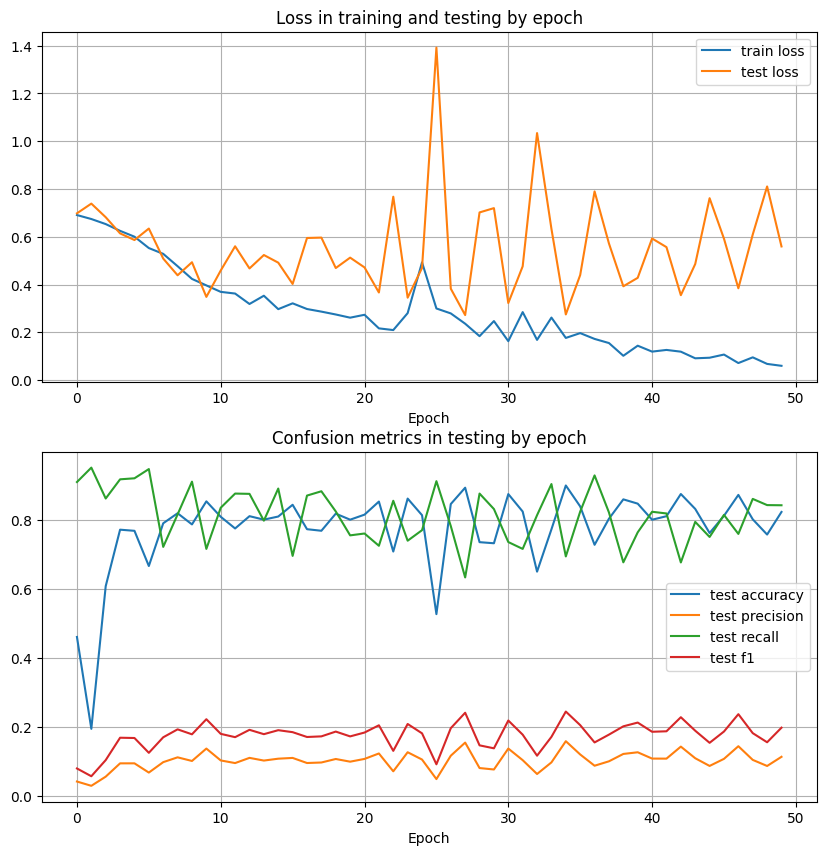

In [5]:

print(f"Training ends {datetime.now().isoformat()}")
for metric in ["accuracy", "precision", "recall", "f1", "mcc"]:
    if len(model_metrics[f"test_{metric}"]) > 0:
        print(f"Test {metric}:", model_metrics[f"test_{metric}"][-1])

plot_model_metrics(model_metrics)